# IMPORT #

In [1]:
import numpy as np
import pandas as pd
import ast
import pickle
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy.stats import mode
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
import umap
from imblearn.over_sampling import SMOTE
%load_ext autotime
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from datetime import timedelta

import math

from keras.optimizers import Adam
import datetime

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance  # Import permutation_importance from sklearn.inspection
import xgboost as xgb

import shap

from sklearn.linear_model import LogisticRegression

time: 397 ms (started: 2023-07-13 16:06:21 +05:30)


In [2]:
with open('naman_table_data_08062023.pkl', 'rb') as f:
    data = pickle.load(f)

time: 1.98 s (started: 2023-07-13 16:06:22 +05:30)


In [3]:
pd.set_option('display.max_rows', 75) 
pd.set_option('display.max_columns', 75)
pd.set_option('display.width', 75)  

time: 198 µs (started: 2023-07-13 16:06:24 +05:30)


# OP & CP #

In [4]:
op=3
cp=15
#dont change

time: 118 µs (started: 2023-07-13 16:06:24 +05:30)


# DATA #

In [5]:
data

,event_date,user_pseudo_id,version,os_version,continent,sub_continent,country,medium,source,device_category,mobile_brand_name,language,platform_age,PFO_count,session_count,home_loaded_sessions,onlines,offlines,play_button_session,play_button_freq,game_tier_session,game_tier_freq,matching_started_session,matching_started_freq,matching_found_session,matching_found_freq,game_started_session,game_started_freq,game_ended_session,game_ended_freq,bag_unlock_started_freq,bag_unlocked_freq,bag_unzipped_freq,tutorial_state,skills_visit,styles_visit,styles_change_freq,eng_time_sec_sv,eng_time_sec_ue,avg_loading_time,app_remove_count,bot_matching_found,real_matching_found,bot_match_won,bot_match_lost,bot_match_forfeited,real_match_won,real_match_lost,real_match_forfeited,avg_matching_time,basic_bag_unlock_started_freq,advance_bag_unlock_started_freq,pro_bag_unlock_started_freq,basic_bag_unlocked_freq,advance_bag_unlocked_freq,pro_bag_unlocked_freq,coin_balance,gem_balance,user_skill_level
0,2023-02-22,f9f4e599b3f5c2693c798f129bb98922,2.02.03,Android 11,Asia,Southern Asia,Bangladesh,(none),(direct),mobile,Vivo,en,0,0.0,2,1,0.0,0.0,1,2,1,22,1,22,1,22,1,22,1,21,0.0,0.0,0.0,NaN,0.0,0.0,0.0,20749.870,567.350,3.027426,0,7.0,15.0,4.0,2.0,1.0,9.0,6.0,0.0,3.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-22,601b8682e55ba13c444d4f905e0b9637,2.05.02,Android 13,Americas,South America,Argentina,organic,google-play,mobile,Samsung,es,6,NaN,1,1,0.0,0.0,1,7,1,19,1,19,1,19,1,19,1,17,2.0,5.0,76.0,NaN,6.0,5.0,27.0,25857.423,719.664,NaN,0,12.0,7.0,7.0,4.0,1.0,4.0,2.0,1.0,3.894737,1.0,0.0,1.0,5.0,0.0,0.0,5385.0,0.0,NaN
2,2023-02-19,ec86a417777cf9c8e9f7b835a564f03d,2.02.03,Android 6.0.1,Americas,South America,Argentina,None,None,mobile,Samsung,es,0,0.0,3,3,0.0,0.0,3,14,3,24,3,24,3,24,3,24,3,23,11.0,10.0,0.0,NaN,3.0,0.0,13.0,26393.093,693.040,3.017174,1,17.0,7.0,13.0,3.0,1.0,7.0,0.0,0.0,3.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-19,94191126e12dadc8c774de2687ed7d18,2.02.03,Android 9,Asia,Central Asia,Kyrgyzstan,organic,google-play,mobile,Xiaomi,ru,0,0.0,7,5,0.0,0.0,5,9,5,19,5,19,5,19,5,18,3,16,3.0,1.0,0.0,NaN,0.0,1.0,5.0,16554.572,741.710,3.005754,0,10.0,8.0,3.0,5.0,2.0,3.0,5.0,0.0,3.578947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-19,1ed98d14ca7633bbd4f03885ac3f7bd5,2.02.03,Android 9,Americas,Caribbean,Dominican Republic,cpc,google,tablet,Amazon,es,1,NaN,4,4,0.0,0.0,4,6,4,26,4,26,4,25,4,25,4,25,1.0,0.0,0.0,NaN,0.0,0.0,0.0,26341.686,404.084,3.006381,0,16.0,9.0,9.0,7.0,0.0,6.0,3.0,0.0,3.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019583,2023-03-07,3e0269cb84e95df44156fec113d15a38,2.02.05,Android 11,Asia,Western Asia,Iraq,organic,google-play,tablet,Samsung,ar,11,NaN,1,1,0.0,0.0,1,9,1,16,1,16,1,16,1,16,1,16,6.0,6.0,32.0,NaN,1.0,1.0,9.0,31053.607,12.138,3.006782,0,9.0,7.0,4.0,5.0,0.0,4.0,3.0,0.0,4.000000,5.0,1.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN
7019584,2023-03-24,3320635712ffd1c0a6f710cc2d342364,2.03.02,Android 11,Asia,Western Asia,Iraq,None,None,mobile,Samsung,ar,0,0.0,3,3,0.0,0.0,3,9,3,16,3,16,3,16,2,15,2,15,0.0,0.0,0.0,NaN,0.0,1.0,8.0,19479.498,985.821,3.007746,0,14.0,1.0,4.0,10.0,0.0,0.0,1.0,0.0,5.125000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7019585,2023-03-12,d2afda28e0d7833c6b06e027b99cf919,2.02.05,Android 9,Asia,Southern Asia,India,cpc,google,mobile,Xiaomi,en,0,0.0,4,4,0.0,0.0,3,3,3,16,3,16,3,16,3,16,3,15,0.0,0.0,0.0,NaN,0.0,0.0,0.0,18614.985,357.792,3.010895,0,8.0,8.0,3.0,5.0,0.0,3.0,4.0,1.0,4.812500,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7019586,2023-06-03,a367067a4b9d7757b8467da7c3dbaa72,2.05.03,Android 12,Asia,Southern Asia,India,None,None,mobile,Vivo,en,0,0.0,1,1,0.0,0.0,1,4,1,18,1,18,1,16,1,16,1,16,0.0,0.0,0.0,NaN,3.0,5.0,22.0,22128.501,971.557,10.165329,0,10.0,6.0,10.0,0.0,0.0,3.0,3.0,0.0,6.750000,0.0,0.0,0

time: 19.1 ms (started: 2023-07-13 16:06:24 +05:30)


In [6]:
df=data

time: 116 µs (started: 2023-07-13 16:06:24 +05:30)


In [7]:
date_to_compare = datetime.datetime(2023, 3, 1)
df['event_date'] = pd.to_datetime(df['event_date'])  # Convert 'event_date' column to Timestamp
df = df[df['event_date'] >= date_to_compare]
df = df.reset_index(drop=True)

time: 1.7 s (started: 2023-07-13 16:06:24 +05:30)


In [8]:
df['session_count']=df.apply(lambda row: row['home_loaded_sessions'] if row['home_loaded_sessions']>row['session_count'] else row['session_count'],axis=1)


time: 29.9 s (started: 2023-07-13 16:06:26 +05:30)


In [9]:
df['matching_found']=df['real_matching_found']+df['bot_matching_found']
df['match_won']=df['bot_match_won']+df['real_match_won']
df['match_lost']=df['bot_match_lost']+df['real_match_lost']
df['match_forfeited']=df['bot_match_forfeited']+df['real_match_forfeited']

df.drop(['real_matching_found','bot_matching_found','bot_match_won','real_match_won','bot_match_lost',
         'real_match_lost','bot_match_forfeited','real_match_forfeited'],axis=1,inplace=True)

# Merged bot and real matches.

df[['match_won','match_lost','matching_found','match_forfeited']]=df[['match_won','match_lost','matching_found','match_forfeited']].fillna(0)
                                                                  

time: 1.59 s (started: 2023-07-13 16:06:55 +05:30)


In [10]:
df['matching_not_found']=df['matching_started_freq']-df['matching_found']

time: 6.56 ms (started: 2023-07-13 16:06:57 +05:30)


In [11]:
df['match_win_ratio']=df.apply(lambda row: row['match_won']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)
df['match_lost_ratio']=df.apply(lambda row: row['match_lost']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)
df['match_forfeited_ratio']=df.apply(lambda row: row['match_forfeited']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)

time: 1min 14s (started: 2023-07-13 16:06:57 +05:30)


In [12]:
df['did_not_load_freq']=df.apply(lambda row:row['session_count']-row['home_loaded_sessions'],axis=1)
df['did_not_load_ratio']=df.apply(lambda row:row['did_not_load_freq']/row['session_count'] if row['session_count']!=0 else 0,axis=1)


time: 53.9 s (started: 2023-07-13 16:08:12 +05:30)


In [13]:
df=df.sort_values(by=['user_pseudo_id','event_date'])

time: 7.75 s (started: 2023-07-13 16:09:06 +05:30)


In [14]:
df=df[['event_date','user_pseudo_id','platform_age','PFO_count','session_count','did_not_load_freq','did_not_load_ratio',
       'game_started_freq','bag_unlock_started_freq','bag_unzipped_freq','matching_found','match_won','match_lost',
       'match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio','matching_not_found','app_remove_count']]

time: 627 ms (started: 2023-07-13 16:09:13 +05:30)


In [15]:
df['min_PFO'] = df.groupby('user_pseudo_id')['PFO_count'].transform('min')
df=df[df['min_PFO']==0]
df.drop(['PFO_count','min_PFO'],axis=1,inplace=True)

time: 3.08 s (started: 2023-07-13 16:09:14 +05:30)


In [16]:
df=df[(df['session_count']!=0) | (df['game_started_freq']>0)]

time: 164 ms (started: 2023-07-13 16:09:17 +05:30)


In [17]:
df_op=df[df['platform_age']<op]
df_cp=df[(df['platform_age']>=op) & (df['platform_age']<(cp+op))]

time: 152 ms (started: 2023-07-13 16:09:17 +05:30)


In [18]:
df_cp = df_cp[df_cp['app_remove_count'] == 0]
#df_op = df_op[df_op['app_remove_count'] == 0]

time: 45.2 ms (started: 2023-07-13 16:09:17 +05:30)


In [19]:
df_op['churn'] = (~df_op['user_pseudo_id'].isin(df_cp['user_pseudo_id'])).astype(int)

time: 212 ms (started: 2023-07-13 16:09:17 +05:30)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
df_op=df_op.groupby('user_pseudo_id').agg({'platform_age':list,'session_count':list,'did_not_load_freq':list,
                                    'did_not_load_ratio':list,'game_started_freq':list,'bag_unlock_started_freq':list,
                                    'bag_unzipped_freq':list,'matching_found':list,'match_won':list,'match_lost':list,
                                    'match_forfeited':list,'match_win_ratio':list,'match_lost_ratio':list,
                                    'match_forfeited_ratio':list,'matching_not_found':list,'churn':max,'app_remove_count':max
                                    })

time: 2min 47s (started: 2023-07-13 16:09:18 +05:30)


In [21]:
df_op = df_op[df_op['app_remove_count'] == 0]

time: 429 ms (started: 2023-07-13 16:12:05 +05:30)


In [22]:
for col in ['session_count','did_not_load_freq','did_not_load_ratio','game_started_freq','bag_unlock_started_freq','bag_unzipped_freq',
       'matching_found','match_won','match_lost','match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio',
           'matching_not_found']:
    df_op[col+'_hm']=df_op.apply(lambda row: dict(zip(row['platform_age'], row[col])),axis=1)
    

time: 51.3 s (started: 2023-07-13 16:12:06 +05:30)


In [23]:
#for col in ['session_count','game_started_freq']:
#    df_op[col+'_mean'] = df_op[col].apply(lambda x: pd.Series(x).mean())
#    df_op[col+'_variance'] = df_op[col].apply(lambda x: pd.Series(x).var())

time: 131 µs (started: 2023-07-13 16:12:57 +05:30)


In [24]:
def extract_index(hashmap, index):
    try:
        return hashmap[index]
    except KeyError:
        return 0
    
for i in range(op):
    for col in ['session_count','did_not_load_freq','did_not_load_ratio','game_started_freq','bag_unlock_started_freq','bag_unzipped_freq',
       'matching_found','match_won','match_lost','match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio',
               'matching_not_found']:
        df_op[col+'_d'+str(i)] = df_op[col+'_hm'].apply(lambda x: extract_index(x, i))                                                                               

time: 7.5 s (started: 2023-07-13 16:12:57 +05:30)


In [25]:
for col in ['session_count','game_started_freq']:
    df_op[col+'_list'] = [list(zip([row[col+'_d0']], [row[col+'_d1']], [row[col+'_d2']])) for _, row in df_op.iterrows()]


time: 30.1 s (started: 2023-07-13 16:13:04 +05:30)


In [26]:
for col in ['session_count', 'game_started_freq']:
    df_op[col+'_mean'] = df_op[col+'_list'].apply(lambda x: np.mean([item for item in x]))
    df_op[col+'_variance'] = df_op[col+'_list'].apply(lambda x: np.var([item for item in x]))

time: 20.6 s (started: 2023-07-13 16:13:34 +05:30)


In [27]:
#df_op=df_op.fillna(-1)

time: 84.5 µs (started: 2023-07-13 16:13:55 +05:30)


In [28]:
df_op.game_started_freq_variance

user_pseudo_id
000008bcf0a2691bbc4f1901733b7690     0.000000
00001a53dfa72569ed4dac43e57e66c0     2.888889
000035bd2fbae179d427e63f180ac21b     3.555556
00005206e2d7d8a49b7db711d8caa0f7     6.000000
0000531c5384fef8a1dc2f775b938958     3.555556
                                      ...    
ffffb61c9f1c7b1c05b1fdb8b3b870cb     0.000000
ffffc024ee1b5aa35ba28189addb9552     0.000000
ffffe25b31702b8f9d15f51cbfc962a4     0.000000
fffff0944a7a97cb34db9b2f5919d315     6.222222
ffffffff6a58486e60a642b348b22bd0    10.888889
Name: game_started_freq_variance, Length: 859999, dtype: float64

time: 75.4 ms (started: 2023-07-13 16:13:55 +05:30)


In [29]:
df_op['match_win_ratio_d0'] = df_op.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_win_ratio_d0'], axis=1)
df_op['match_lost_ratio_d0'] = df_op.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_lost_ratio_d0'], axis=1)
df_op['match_forfeited_ratio_d0'] = df_op.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_forfeited_ratio_d0'], axis=1)

df_op['match_win_ratio_d1'] = df_op.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_win_ratio_d1'], axis=1)
df_op['match_lost_ratio_d1'] = df_op.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_lost_ratio_d1'], axis=1)
df_op['match_forfeited_ratio_d1'] = df_op.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_forfeited_ratio_d1'], axis=1)

df_op['match_win_ratio_d2'] = df_op.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_win_ratio_d2'], axis=1)
df_op['match_lost_ratio_d2'] = df_op.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_lost_ratio_d2'], axis=1)
df_op['match_forfeited_ratio_d2'] = df_op.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_forfeited_ratio_d2'], axis=1)


time: 33.7 s (started: 2023-07-13 16:13:55 +05:30)


In [60]:
df2 = df_op.select_dtypes(include=['number'])

time: 167 ms (started: 2023-07-13 17:58:23 +05:30)


# RFC MODEL #

In [31]:
df2 = df2[[col for col in df2.columns if col != 'churn'] + ['churn']]

time: 38.2 ms (started: 2023-07-13 16:14:29 +05:30)


In [32]:
x=df2.drop('churn',axis=1,inplace=False)
y=df2.churn

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

model=RandomForestClassifier(n_estimators=200,class_weight='balanced',n_jobs=-1,max_depth=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

time: 7.58 s (started: 2023-07-13 16:14:29 +05:30)


In [33]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56    240408
           1       0.71      0.76      0.73    361591

    accuracy                           0.67    601999
   macro avg       0.65      0.64      0.64    601999
weighted avg       0.66      0.67      0.66    601999

time: 652 ms (started: 2023-07-13 16:14:37 +05:30)


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56    103032
           1       0.71      0.76      0.73    154968

    accuracy                           0.67    258000
   macro avg       0.65      0.64      0.64    258000
weighted avg       0.66      0.67      0.66    258000

time: 274 ms (started: 2023-07-13 16:14:37 +05:30)


In [35]:
importances = model.feature_importances_
feature_importance = dict(zip(x.columns, importances))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

session_count_mean: 0.13175371546022444
session_count_d2: 0.10880282898242276
session_count_d1: 0.07279986153276267
game_started_freq_mean: 0.0666334311587337
match_forfeited_ratio_d2: 0.06274847419451685
matching_found_d2: 0.051816074116202426
match_win_ratio_d2: 0.05032920262644047
match_lost_ratio_d2: 0.047893970898235334
game_started_freq_d2: 0.0422315141074865
game_started_freq_d1: 0.03870809681510542
match_won_d2: 0.03366870637952495
matching_found_d1: 0.03177459199216346
game_started_freq_variance: 0.028655952551562176
match_win_ratio_d1: 0.026694852023631303
match_lost_d2: 0.024504685297112354
match_lost_ratio_d1: 0.022901559569391453
did_not_load_ratio_d2: 0.017744383237316735
match_forfeited_ratio_d1: 0.017727483550137382
did_not_load_freq_d2: 0.01756317905011111
match_lost_d1: 0.016026433811720805
matching_found_d0: 0.01227770520185742
match_won_d1: 0.011620498385124398
session_count_variance: 0.01084487349367877
match_lost_d0: 0.00985991913591222
game_started_freq_d0: 0.009

# XGB #

In [36]:
model_xgb = xgb.XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1)
model_xgb.fit(x_train, y_train)
y_pred_xgb=model_xgb.predict(x_test)

time: 48.2 s (started: 2023-07-13 16:14:38 +05:30)


In [37]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.64      0.43      0.52    103032
           1       0.69      0.84      0.76    154968

    accuracy                           0.68    258000
   macro avg       0.66      0.63      0.64    258000
weighted avg       0.67      0.68      0.66    258000

time: 250 ms (started: 2023-07-13 16:15:26 +05:30)


# LOGISTIC REGRESSION #

In [38]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_lr = logreg.predict(x_test)

time: 6.85 s (started: 2023-07-13 16:15:26 +05:30)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [39]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.66      0.36      0.47    103032
           1       0.67      0.88      0.76    154968

    accuracy                           0.67    258000
   macro avg       0.67      0.62      0.61    258000
weighted avg       0.67      0.67      0.64    258000

time: 280 ms (started: 2023-07-13 16:15:33 +05:30)


# PIPELINE #

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

# df -> NAMAN Table
def custom_function_training_dataset(df):
    op=3
    cp=15
    df=df.sort_values(by=['user_pseudo_id','event_date'])
    date_to_compare = datetime.datetime(2023, 3, 1)
    df['event_date'] = pd.to_datetime(df['event_date'])  # Convert 'event_date' column to Timestamp
    df = df[df['event_date'] >= date_to_compare]
    df = df.reset_index(drop=True)
    df['session_count']=df.apply(lambda row: row['home_loaded_sessions'] if row['home_loaded_sessions']>row['session_count'] else row['session_count'],axis=1)
    df['matching_found']=df['real_matching_found']+df['bot_matching_found']
    df['match_won']=df['bot_match_won']+df['real_match_won']
    df['match_lost']=df['bot_match_lost']+df['real_match_lost']
    df['match_forfeited']=df['bot_match_forfeited']+df['real_match_forfeited']
    df.drop(['real_matching_found','bot_matching_found','bot_match_won','real_match_won','bot_match_lost',
             'real_match_lost','bot_match_forfeited','real_match_forfeited'],axis=1,inplace=True)
    # Merged bot and real matches.
    df[['match_won','match_lost','matching_found','match_forfeited']]=df[['match_won','match_lost','matching_found','match_forfeited']].fillna(0)
    df['matching_not_found']=df['matching_started_freq']-df['matching_found']
    df['match_win_ratio']=df.apply(lambda row: row['match_won']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)
    df['match_lost_ratio']=df.apply(lambda row: row['match_lost']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)
    df['match_forfeited_ratio']=df.apply(lambda row: row['match_forfeited']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)
    df['did_not_load_freq']=df.apply(lambda row:row['session_count']-row['home_loaded_sessions'],axis=1)
    df['did_not_load_ratio']=df.apply(lambda row:row['did_not_load_freq']/row['session_count'] if row['session_count']!=0 else 0,axis=1)
    df=df[['event_date','user_pseudo_id','platform_age','PFO_count','session_count','did_not_load_freq','did_not_load_ratio',
       'game_started_freq','bag_unlock_started_freq','bag_unzipped_freq','matching_found','match_won','match_lost',
       'match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio','matching_not_found','app_remove_count']]
    df=df[(df['session_count']!=0) | (df['game_started_freq']>0)] 
    df_op=df[df['platform_age']<op]
    df_cp=df[(df['platform_age']>=op) & (df['platform_age']<(cp+op))]
    df_op['churn'] = (~df_op['user_pseudo_id'].isin(df_cp['user_pseudo_id'])).astype(int)
    df_op=df_op.groupby('user_pseudo_id').agg({'platform_age':list,'session_count':list,'did_not_load_freq':list,
                                    'did_not_load_ratio':list,'game_started_freq':list,'bag_unlock_started_freq':list,
                                    'bag_unzipped_freq':list,'matching_found':list,'match_won':list,'match_lost':list,
                                    'match_forfeited':list,'match_win_ratio':list,'match_lost_ratio':list,
                                    'match_forfeited_ratio':list,'matching_not_found':list,'churn':max,'app_remove_count':max
                                    })
    for col in ['session_count','did_not_load_freq','did_not_load_ratio','game_started_freq','bag_unlock_started_freq','bag_unzipped_freq',
       'matching_found','match_won','match_lost','match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio',
           'matching_not_found']:
        df_op[col+'_hm']=df_op.apply(lambda row: dict(zip(row['platform_age'], row[col])),axis=1)
    def extract_index(hashmap, index):
        try:
            return hashmap[index]
        except KeyError:
            return 0

    for i in range(op):
        for col in ['session_count','did_not_load_freq','did_not_load_ratio','game_started_freq','bag_unlock_started_freq','bag_unzipped_freq',
           'matching_found','match_won','match_lost','match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio',
                   'matching_not_found']:
            df_op[col+'_d'+str(i)] = df_op[col+'_hm'].apply(lambda x: extract_index(x, i))
    df_op = df_op[df_op['app_remove_count'] == 0]
    for col in ['session_count','game_started_freq']:
        df_op[col+'_list'] = [list(zip([row[col+'_d0']], [row[col+'_d1']], [row[col+'_d2']])) for _, row in df_op.iterrows()]
    for col in ['session_count', 'game_started_freq']:
        df_op[col+'_mean'] = df_op[col+'_list'].apply(lambda x: np.mean([item for item in x]))
        df_op[col+'_variance'] = df_op[col+'_list'].apply(lambda x: np.var([item for item in x]))
    df_op['match_win_ratio_d0'] = df_op.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_win_ratio_d0'], axis=1)
    df_op['match_lost_ratio_d0'] = df_op.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_lost_ratio_d0'], axis=1)
    df_op['match_forfeited_ratio_d0'] = df_op.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_forfeited_ratio_d0'], axis=1)

    df_op['match_win_ratio_d1'] = df_op.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_win_ratio_d1'], axis=1)
    df_op['match_lost_ratio_d1'] = df_op.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_lost_ratio_d1'], axis=1)
    df_op['match_forfeited_ratio_d1'] = df_op.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_forfeited_ratio_d1'], axis=1)

    df_op['match_win_ratio_d2'] = df_op.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_win_ratio_d2'], axis=1)
    df_op['match_lost_ratio_d2'] = df_op.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_lost_ratio_d2'], axis=1)
    df_op['match_forfeited_ratio_d2'] = df_op.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_forfeited_ratio_d2'], axis=1)
    df_op = df_op.select_dtypes(include=['number'])
    return df_op.drop('churn',axis=1,inplace=False),df_op.churn

def custom_function_testing_dataset(df):
    op=3
    df=df[df['platform_age']<op]
    df=df.sort_values(by=['user_pseudo_id','event_date'])
    date_to_compare = datetime.datetime(2023, 3, 1)
    df['event_date'] = pd.to_datetime(df['event_date'])  # Convert 'event_date' column to Timestamp
    df = df[df['event_date'] >= date_to_compare]
    df = df.reset_index(drop=True)
    df['session_count']=df.apply(lambda row: row['home_loaded_sessions'] if row['home_loaded_sessions']>row['session_count'] else row['session_count'],axis=1)
    df['matching_found']=df['real_matching_found']+df['bot_matching_found']
    df['match_won']=df['bot_match_won']+df['real_match_won']
    df['match_lost']=df['bot_match_lost']+df['real_match_lost']
    df['match_forfeited']=df['bot_match_forfeited']+df['real_match_forfeited']
    df.drop(['real_matching_found','bot_matching_found','bot_match_won','real_match_won','bot_match_lost',
             'real_match_lost','bot_match_forfeited','real_match_forfeited'],axis=1,inplace=True)
    # Merged bot and real matches.
    df[['match_won','match_lost','matching_found','match_forfeited']]=df[['match_won','match_lost','matching_found','match_forfeited']].fillna(0)
    df['matching_not_found']=df['matching_started_freq']-df['matching_found']
    df['match_win_ratio']=df.apply(lambda row: row['match_won']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)
    df['match_lost_ratio']=df.apply(lambda row: row['match_lost']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)
    df['match_forfeited_ratio']=df.apply(lambda row: row['match_forfeited']/row['matching_found'] if row['matching_found']!=0 else 0,axis=1)
    df['did_not_load_freq']=df.apply(lambda row:row['session_count']-row['home_loaded_sessions'],axis=1)
    df['did_not_load_ratio']=df.apply(lambda row:row['did_not_load_freq']/row['session_count'] if row['session_count']!=0 else 0,axis=1)
    df=df[['event_date','user_pseudo_id','platform_age','PFO_count','session_count','did_not_load_freq','did_not_load_ratio',
       'game_started_freq','bag_unlock_started_freq','bag_unzipped_freq','matching_found','match_won','match_lost',
       'match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio','matching_not_found','app_remove_count']]
    df=df[(df['session_count']!=0) | (df['game_started_freq']>0)] 
    df=df.groupby('user_pseudo_id').agg({'platform_age':list,'session_count':list,'did_not_load_freq':list,
                                    'did_not_load_ratio':list,'game_started_freq':list,'bag_unlock_started_freq':list,
                                    'bag_unzipped_freq':list,'matching_found':list,'match_won':list,'match_lost':list,
                                    'match_forfeited':list,'match_win_ratio':list,'match_lost_ratio':list,
                                    'match_forfeited_ratio':list,'matching_not_found':list,'app_remove_count':max
                                    })
    for col in ['session_count','did_not_load_freq','did_not_load_ratio','game_started_freq','bag_unlock_started_freq','bag_unzipped_freq',
       'matching_found','match_won','match_lost','match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio',
           'matching_not_found']:
        df[col+'_hm']=df.apply(lambda row: dict(zip(row['platform_age'], row[col])),axis=1)
    def extract_index(hashmap, index):
        try:
            return hashmap[index]
        except KeyError:
            return 0

    for i in range(op):
        for col in ['session_count','did_not_load_freq','did_not_load_ratio','game_started_freq','bag_unlock_started_freq','bag_unzipped_freq',
           'matching_found','match_won','match_lost','match_forfeited','match_win_ratio','match_lost_ratio','match_forfeited_ratio',
                   'matching_not_found']:
            df[col+'_d'+str(i)] = df[col+'_hm'].apply(lambda x: extract_index(x, i))
    for col in ['session_count','game_started_freq']:
        df[col+'_list'] = [list(zip([row[col+'_d0']], [row[col+'_d1']], [row[col+'_d2']])) for _, row in df.iterrows()]
    for col in ['session_count', 'game_started_freq']:
        df[col+'_mean'] = df[col+'_list'].apply(lambda x: np.mean([item for item in x]))
        df[col+'_variance'] = df[col+'_list'].apply(lambda x: np.var([item for item in x]))
    df['match_win_ratio_d0'] = df.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_win_ratio_d0'], axis=1)
    df['match_lost_ratio_d0'] = df.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_lost_ratio_d0'], axis=1)
    df['match_forfeited_ratio_d0'] = df.apply(lambda row: -1 if (row['matching_found_d0'] == 0) else row['match_forfeited_ratio_d0'], axis=1)

    df['match_win_ratio_d1'] = df.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_win_ratio_d1'], axis=1)
    df['match_lost_ratio_d1'] = df.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_lost_ratio_d1'], axis=1)
    df['match_forfeited_ratio_d1'] = df.apply(lambda row: -1 if (row['matching_found_d1'] == 0) else row['match_forfeited_ratio_d1'], axis=1)

    df['match_win_ratio_d2'] = df.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_win_ratio_d2'], axis=1)
    df['match_lost_ratio_d2'] = df.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_lost_ratio_d2'], axis=1)
    df['match_forfeited_ratio_d2'] = df.apply(lambda row: -1 if (row['matching_found_d2'] == 0 ) else row['match_forfeited_ratio_d2'], axis=1)
    df = df.select_dtypes(include=['number'])
    return df

pipeline = Pipeline([
    ('training_dataset_transform', FunctionTransformer(custom_function_training_dataset)),
    ('test_dataset_transform', FunctionTransformer(custom_function_testing_dataset)),
    ('classifier', RandomForestClassifier(n_estimators=100,class_weight='balanced',n_jobs=-1,max_depth=7))])

time: 4.9 ms (started: 2023-07-13 16:15:44 +05:30)


In [42]:
x_train,y_train=pipeline['training_dataset_transform'].fit_transform(data)
pipeline['classifier'].fit(x_train, y_train)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1)

time: 10min 39s (started: 2023-07-13 16:15:44 +05:30)


In [43]:
x_test = pipeline['test_dataset_transform'].fit_transform(data)

time: 10min 30s (started: 2023-07-13 16:26:24 +05:30)


In [44]:
y_test = pipeline['classifier'].predict(x_test)

time: 1.38 s (started: 2023-07-13 16:36:54 +05:30)


In [45]:
x_test

,app_remove_count,session_count_d0,did_not_load_freq_d0,did_not_load_ratio_d0,game_started_freq_d0,bag_unlock_started_freq_d0,bag_unzipped_freq_d0,matching_found_d0,match_won_d0,match_lost_d0,match_forfeited_d0,match_win_ratio_d0,match_lost_ratio_d0,match_forfeited_ratio_d0,matching_not_found_d0,session_count_d1,did_not_load_freq_d1,did_not_load_ratio_d1,game_started_freq_d1,bag_unlock_started_freq_d1,bag_unzipped_freq_d1,matching_found_d1,match_won_d1,match_lost_d1,match_forfeited_d1,match_win_ratio_d1,match_lost_ratio_d1,match_forfeited_ratio_d1,matching_not_found_d1,session_count_d2,did_not_load_freq_d2,did_not_load_ratio_d2,game_started_freq_d2,bag_unlock_started_freq_d2,bag_unzipped_freq_d2,matching_found_d2,match_won_d2,match_lost_d2,match_forfeited_d2,match_win_ratio_d2,match_lost_ratio_d2,match_forfeited_ratio_d2,matching_not_found_d2,session_count_mean,session_count_variance,game_started_freq_mean,game_started_freq_variance
user_pseudo_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000007d74ebc8d84048c523ce1f6865,0,1,0,0.000000,1,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.000000,0.00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,0.333333,0.222222
000008bcf0a2691bbc4f1901733b7690,0,1,1,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,0.000000,0.000000
000008ffaa46bffd9f20145b3d1e3c30,1,1,0,0.000000,2,0.0,0.0,2.0,0.0,1.0,1.0,0.000000,0.500000,0.50,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,0.666667,0.888889
000010453b68703916b35b826eadf920,1,1,0,0.000000,3,0.0,0.0,3.0,0.0,3.0,0.0,0.000000,1.000000,0.00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,1.000000,2.000000
00001a53dfa72569ed4dac43e57e66c0,0,3,0,0.000000,4,0.0,0.0,4.0,2.0,1.0,1.0,0.500000,0.250000,0.25,0.0,1,0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,1.333333,1.555556,1.666667,2.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffe25b31702b8f9d15f51cbfc962a4,0,1,0,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,0.000000,0.000000
fffff0944a7a97cb34db9b2f5919d315,0,1,0,0.000000,10,0.0,0.0,10.0,3.0,6.0,1.0,0.300000,0.600000,0.10,0.0,1,0,0.0,4,0.0,0.0,4.0,2.0,1.0,1.0,0.500000,0.250000,0.250000,0.0,1,0,0.0,6,0.0,0.0,6.0,5.0,1.0,0.0,0.833333,0.166667,0.0,0.0,1.000000,0.000000,6.666667,6.222222
fffff435b8d82a25ab909bf9e10873f6,1,1,0,0.000000,14,0.0,0.0,14.0,9.0,5.0,0.0,0.642857,0.357143,0.00,0.0,1,0,0.0,19,0.0,0.0,19.0,8.0,10.0,1.0,0.421053,0.526316,0.052632,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.666667,0.222222,11.000000,64.666667


time: 17.4 ms (started: 2023-07-13 16:36:56 +05:30)


In [46]:
df2=x_test

time: 8.17 ms (started: 2023-07-13 16:36:56 +05:30)


In [47]:
df2['predicted_churn']=y_test

time: 2.29 ms (started: 2023-07-13 16:36:56 +05:30)


In [48]:
df2

,app_remove_count,session_count_d0,did_not_load_freq_d0,did_not_load_ratio_d0,game_started_freq_d0,bag_unlock_started_freq_d0,bag_unzipped_freq_d0,matching_found_d0,match_won_d0,match_lost_d0,match_forfeited_d0,match_win_ratio_d0,match_lost_ratio_d0,match_forfeited_ratio_d0,matching_not_found_d0,session_count_d1,did_not_load_freq_d1,did_not_load_ratio_d1,game_started_freq_d1,bag_unlock_started_freq_d1,bag_unzipped_freq_d1,matching_found_d1,match_won_d1,match_lost_d1,match_forfeited_d1,match_win_ratio_d1,match_lost_ratio_d1,match_forfeited_ratio_d1,matching_not_found_d1,session_count_d2,did_not_load_freq_d2,did_not_load_ratio_d2,game_started_freq_d2,bag_unlock_started_freq_d2,bag_unzipped_freq_d2,matching_found_d2,match_won_d2,match_lost_d2,match_forfeited_d2,match_win_ratio_d2,match_lost_ratio_d2,match_forfeited_ratio_d2,matching_not_found_d2,session_count_mean,session_count_variance,game_started_freq_mean,game_started_freq_variance,predicted_churn
user_pseudo_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000007d74ebc8d84048c523ce1f6865,0,1,0,0.000000,1,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.000000,0.00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,0.333333,0.222222,1
000008bcf0a2691bbc4f1901733b7690,0,1,1,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,0.000000,0.000000,1
000008ffaa46bffd9f20145b3d1e3c30,1,1,0,0.000000,2,0.0,0.0,2.0,0.0,1.0,1.0,0.000000,0.500000,0.50,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,0.666667,0.888889,1
000010453b68703916b35b826eadf920,1,1,0,0.000000,3,0.0,0.0,3.0,0.0,3.0,0.0,0.000000,1.000000,0.00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,1.000000,2.000000,1
00001a53dfa72569ed4dac43e57e66c0,0,3,0,0.000000,4,0.0,0.0,4.0,2.0,1.0,1.0,0.500000,0.250000,0.25,0.0,1,0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,1.333333,1.555556,1.666667,2.888889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffe25b31702b8f9d15f51cbfc962a4,0,1,0,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.333333,0.222222,0.000000,0.000000,1
fffff0944a7a97cb34db9b2f5919d315,0,1,0,0.000000,10,0.0,0.0,10.0,3.0,6.0,1.0,0.300000,0.600000,0.10,0.0,1,0,0.0,4,0.0,0.0,4.0,2.0,1.0,1.0,0.500000,0.250000,0.250000,0.0,1,0,0.0,6,0.0,0.0,6.0,5.0,1.0,0.0,0.833333,0.166667,0.0,0.0,1.000000,0.000000,6.666667,6.222222,0
fffff435b8d82a25ab909bf9e10873f6,1,1,0,0.000000,14,0.0,0.0,14.0,9.0,5.0,0.0,0.642857,0.357143,0.00,0.0,1,0,0.0,19,0.0,0.0,19.0,8.0,10.0,1.0,0.421053,0.526316,0.052632,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.0,0.0,0.666667,0.222222,11.000000,64.666667,0


time: 17.1 ms (started: 2023-07-13 16:36:56 +05:30)


In [59]:
data

,event_date,user_pseudo_id,version,os_version,continent,sub_continent,country,medium,source,device_category,mobile_brand_name,language,platform_age,PFO_count,session_count,home_loaded_sessions,onlines,offlines,play_button_session,play_button_freq,game_tier_session,game_tier_freq,matching_started_session,matching_started_freq,matching_found_session,matching_found_freq,game_started_session,game_started_freq,game_ended_session,game_ended_freq,bag_unlock_started_freq,bag_unlocked_freq,bag_unzipped_freq,tutorial_state,skills_visit,styles_visit,styles_change_freq,eng_time_sec_sv,eng_time_sec_ue,avg_loading_time,app_remove_count,bot_matching_found,real_matching_found,bot_match_won,bot_match_lost,bot_match_forfeited,real_match_won,real_match_lost,real_match_forfeited,avg_matching_time,basic_bag_unlock_started_freq,advance_bag_unlock_started_freq,pro_bag_unlock_started_freq,basic_bag_unlocked_freq,advance_bag_unlocked_freq,pro_bag_unlocked_freq,coin_balance,gem_balance,user_skill_level
0,2023-02-22,f9f4e599b3f5c2693c798f129bb98922,2.02.03,Android 11,Asia,Southern Asia,Bangladesh,(none),(direct),mobile,Vivo,en,0,0.0,2,1,0.0,0.0,1,2,1,22,1,22,1,22,1,22,1,21,0.0,0.0,0.0,NaN,0.0,0.0,0.0,20749.870,567.350,3.027426,0,7.0,15.0,4.0,2.0,1.0,9.0,6.0,0.0,3.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-22,601b8682e55ba13c444d4f905e0b9637,2.05.02,Android 13,Americas,South America,Argentina,organic,google-play,mobile,Samsung,es,6,NaN,1,1,0.0,0.0,1,7,1,19,1,19,1,19,1,19,1,17,2.0,5.0,76.0,NaN,6.0,5.0,27.0,25857.423,719.664,NaN,0,12.0,7.0,7.0,4.0,1.0,4.0,2.0,1.0,3.894737,1.0,0.0,1.0,5.0,0.0,0.0,5385.0,0.0,NaN
2,2023-02-19,ec86a417777cf9c8e9f7b835a564f03d,2.02.03,Android 6.0.1,Americas,South America,Argentina,None,None,mobile,Samsung,es,0,0.0,3,3,0.0,0.0,3,14,3,24,3,24,3,24,3,24,3,23,11.0,10.0,0.0,NaN,3.0,0.0,13.0,26393.093,693.040,3.017174,1,17.0,7.0,13.0,3.0,1.0,7.0,0.0,0.0,3.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-19,94191126e12dadc8c774de2687ed7d18,2.02.03,Android 9,Asia,Central Asia,Kyrgyzstan,organic,google-play,mobile,Xiaomi,ru,0,0.0,7,5,0.0,0.0,5,9,5,19,5,19,5,19,5,18,3,16,3.0,1.0,0.0,NaN,0.0,1.0,5.0,16554.572,741.710,3.005754,0,10.0,8.0,3.0,5.0,2.0,3.0,5.0,0.0,3.578947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-19,1ed98d14ca7633bbd4f03885ac3f7bd5,2.02.03,Android 9,Americas,Caribbean,Dominican Republic,cpc,google,tablet,Amazon,es,1,NaN,4,4,0.0,0.0,4,6,4,26,4,26,4,25,4,25,4,25,1.0,0.0,0.0,NaN,0.0,0.0,0.0,26341.686,404.084,3.006381,0,16.0,9.0,9.0,7.0,0.0,6.0,3.0,0.0,3.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019583,2023-03-07,3e0269cb84e95df44156fec113d15a38,2.02.05,Android 11,Asia,Western Asia,Iraq,organic,google-play,tablet,Samsung,ar,11,NaN,1,1,0.0,0.0,1,9,1,16,1,16,1,16,1,16,1,16,6.0,6.0,32.0,NaN,1.0,1.0,9.0,31053.607,12.138,3.006782,0,9.0,7.0,4.0,5.0,0.0,4.0,3.0,0.0,4.000000,5.0,1.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN
7019584,2023-03-24,3320635712ffd1c0a6f710cc2d342364,2.03.02,Android 11,Asia,Western Asia,Iraq,None,None,mobile,Samsung,ar,0,0.0,3,3,0.0,0.0,3,9,3,16,3,16,3,16,2,15,2,15,0.0,0.0,0.0,NaN,0.0,1.0,8.0,19479.498,985.821,3.007746,0,14.0,1.0,4.0,10.0,0.0,0.0,1.0,0.0,5.125000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7019585,2023-03-12,d2afda28e0d7833c6b06e027b99cf919,2.02.05,Android 9,Asia,Southern Asia,India,cpc,google,mobile,Xiaomi,en,0,0.0,4,4,0.0,0.0,3,3,3,16,3,16,3,16,3,16,3,15,0.0,0.0,0.0,NaN,0.0,0.0,0.0,18614.985,357.792,3.010895,0,8.0,8.0,3.0,5.0,0.0,3.0,4.0,1.0,4.812500,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7019586,2023-06-03,a367067a4b9d7757b8467da7c3dbaa72,2.05.03,Android 12,Asia,Southern Asia,India,None,None,mobile,Vivo,en,0,0.0,1,1,0.0,0.0,1,4,1,18,1,18,1,16,1,16,1,16,0.0,0.0,0.0,NaN,3.0,5.0,22.0,22128.501,971.557,10.165329,0,10.0,6.0,10.0,0.0,0.0,3.0,3.0,0.0,6.750000,0.0,0.0,0

time: 23 ms (started: 2023-07-13 16:58:12 +05:30)


# PLOT RETENTION GRAPHS #

In [50]:
def plot_retention(x, y, df, bins = 10, datewise = False,figsize=(7,7),min_users= 0.01):
    %matplotlib inline
    if datewise == False:
        plt.figure(figsize=figsize)
        tmp = df.copy()
        #tmp = tmp[tmp[x]<tmp[x].quantile(0.98)] ## Remove outliers
        tmp[x] = pd.cut(tmp[x], bins=bins)#.apply(lambda x: (x.left+x.right)/2)
        tmp = tmp.groupby([x]).agg({y:['mean','count']}).reset_index()
        tmp.columns = [x, y, 'users' ]
        tmp = tmp[tmp['users']>=df.shape[0]*min_users]
        plt.plot(tmp[x].astype(str), tmp[y] )
        plt.grid()
        plt.xlabel(x)
        plt.ylabel(y)
        plt.xticks(rotation=45)
        plt.show()
        return tmp 
    elif datewise == True:
        for i in df.event_date.unique():
            plt.figure(figsize=figsize)
            print(i)
            tmp = df[df['event_date']==i].copy()
            tmp[x] = pd.cut(tmp[x], bins=bins).apply(lambda x: x.left)
            tmp = tmp.groupby([x]).agg({y:['mean','count']}).reset_index()
            tmp.columns = [x, y, 'users' ]
            tmp = tmp[tmp['users']>=min_users]
            plt.plot(tmp[x], tmp[y] * 100)
            plt.grid()
            plt.xlabel(x+" - "+str(i)[:10])
            plt.ylabel("Retention %")
            plt.show()
            return tmp
    

time: 3.05 ms (started: 2023-07-13 16:47:21 +05:30)


# CHURN VS SESSION COUNT #

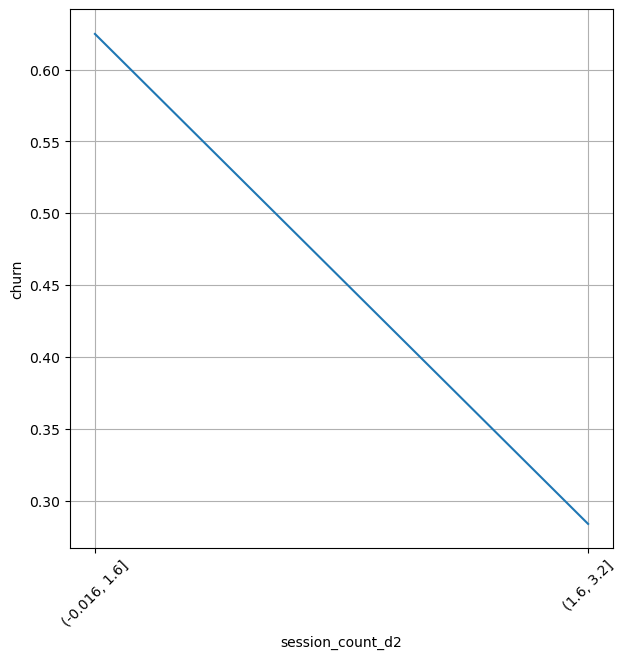

,session_count_d2,churn,users
0,"(-0.016, 1.6]",0.624804,800921
1,"(1.6, 3.2]",0.283948,51844


time: 190 ms (started: 2023-07-13 17:58:29 +05:30)


In [61]:
plot_retention('session_count_d2','churn',df2)

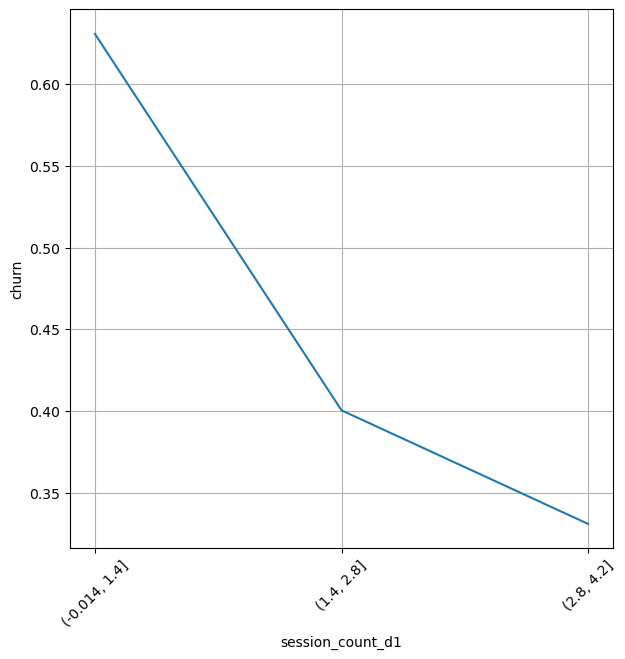

,session_count_d1,churn,users
0,"(-0.014, 1.4]",0.630556,761821
1,"(1.4, 2.8]",0.400565,58757
2,"(2.8, 4.2]",0.331152,33166


time: 172 ms (started: 2023-07-13 17:58:30 +05:30)


In [62]:
plot_retention('session_count_d1','churn',df2)

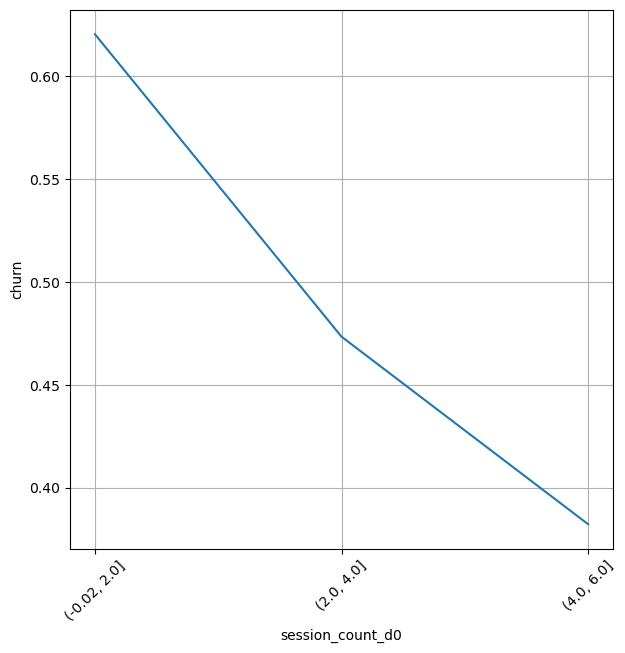

,session_count_d0,churn,users
0,"(-0.02, 2.0]",0.620537,753559
1,"(2.0, 4.0]",0.473381,91571
2,"(4.0, 6.0]",0.382157,12890


time: 127 ms (started: 2023-07-13 17:58:31 +05:30)


In [63]:
plot_retention('session_count_d0','churn',df2)

# CHURN VS GAMES PLAYED #

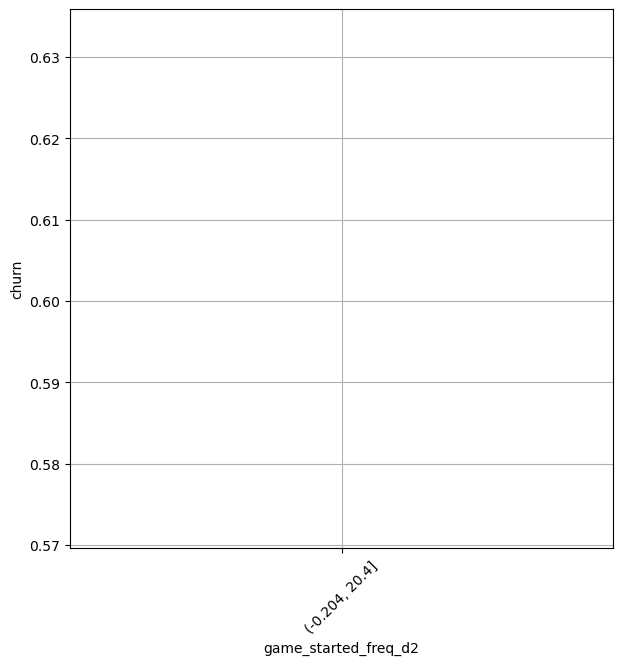

,game_started_freq_d2,churn,users
0,"(-0.204, 20.4]",0.602745,855892


time: 137 ms (started: 2023-07-13 17:58:31 +05:30)


In [64]:
plot_retention('game_started_freq_d2','churn',df2)

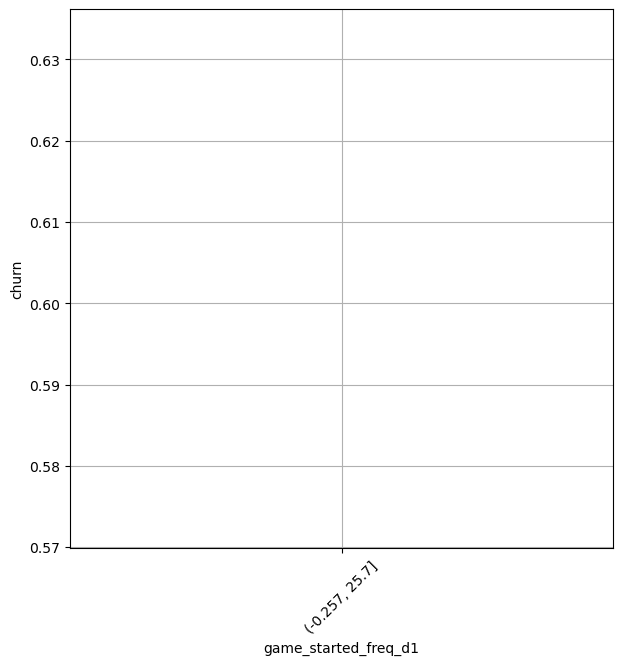

,game_started_freq_d1,churn,users
0,"(-0.257, 25.7]",0.603028,854549


time: 115 ms (started: 2023-07-13 17:58:31 +05:30)


In [65]:
plot_retention('game_started_freq_d1','churn',df2)

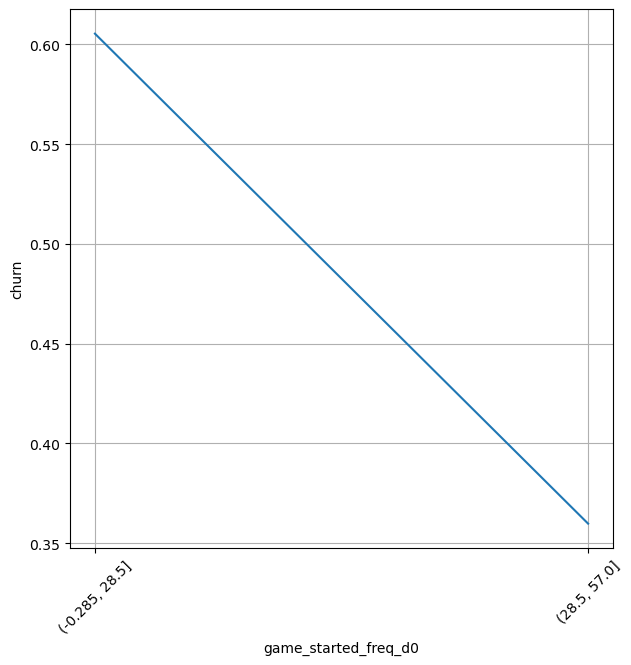

,game_started_freq_d0,churn,users
0,"(-0.285, 28.5]",0.605379,843851
1,"(28.5, 57.0]",0.359822,14421


time: 130 ms (started: 2023-07-13 17:58:32 +05:30)


In [66]:
plot_retention('game_started_freq_d0','churn',df2)

# CHURN VS MATCH WON #

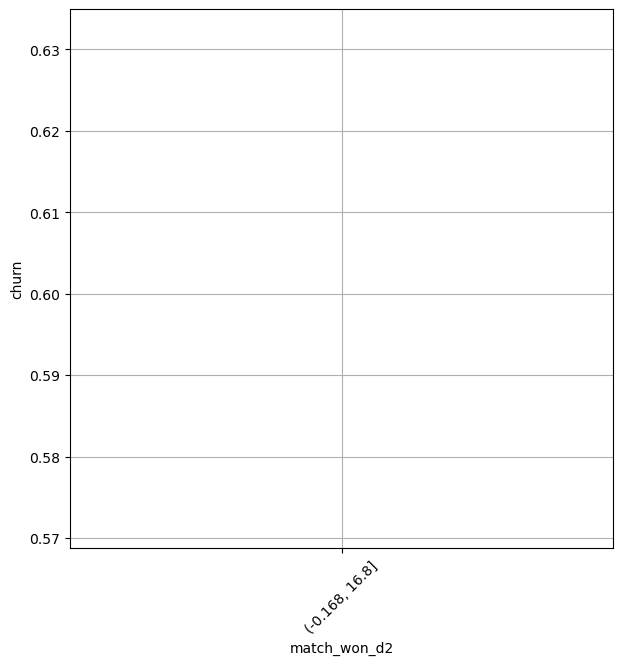

,match_won_d2,churn,users
0,"(-0.168, 16.8]",0.601847,857617


time: 143 ms (started: 2023-07-13 17:58:32 +05:30)


In [67]:
plot_retention('match_won_d2','churn',df2)

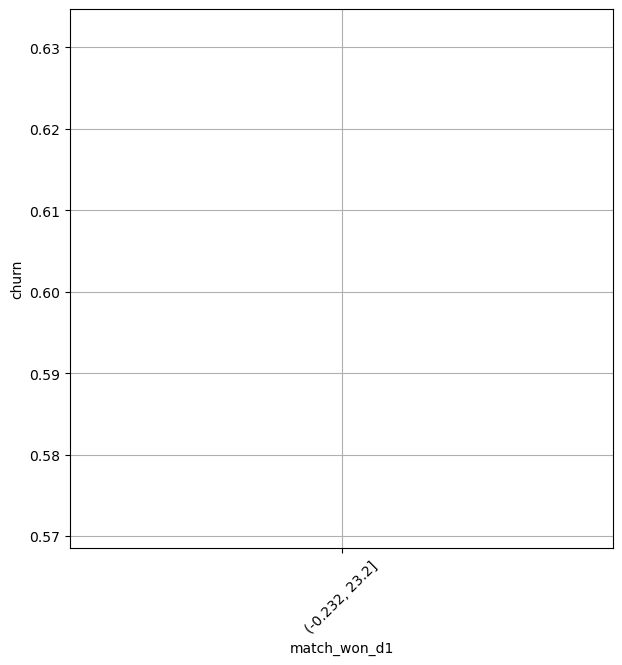

,match_won_d1,churn,users
0,"(-0.232, 23.2]",0.601607,857793


time: 131 ms (started: 2023-07-13 17:58:32 +05:30)


In [68]:
plot_retention('match_won_d1','churn',df2)

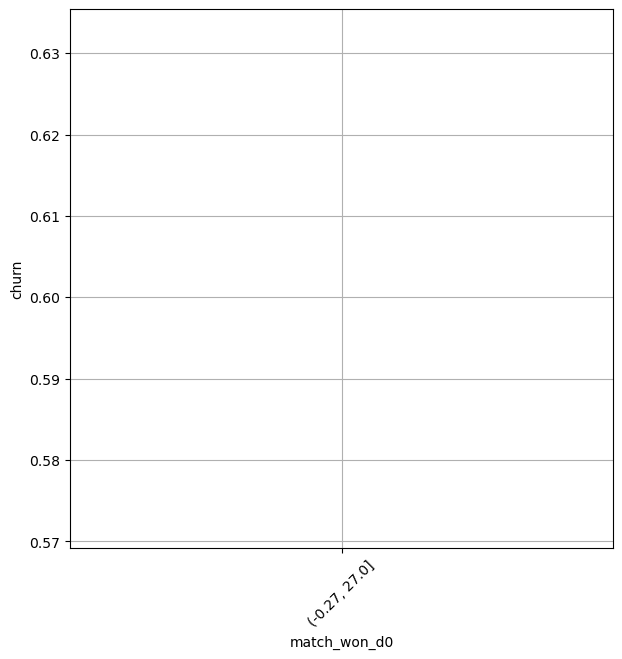

,match_won_d0,churn,users
0,"(-0.27, 27.0]",0.602273,854476


time: 145 ms (started: 2023-07-13 17:58:32 +05:30)


In [69]:
plot_retention('match_won_d0','churn',df2)

# CHURN VS MATCH WIN RATIO #

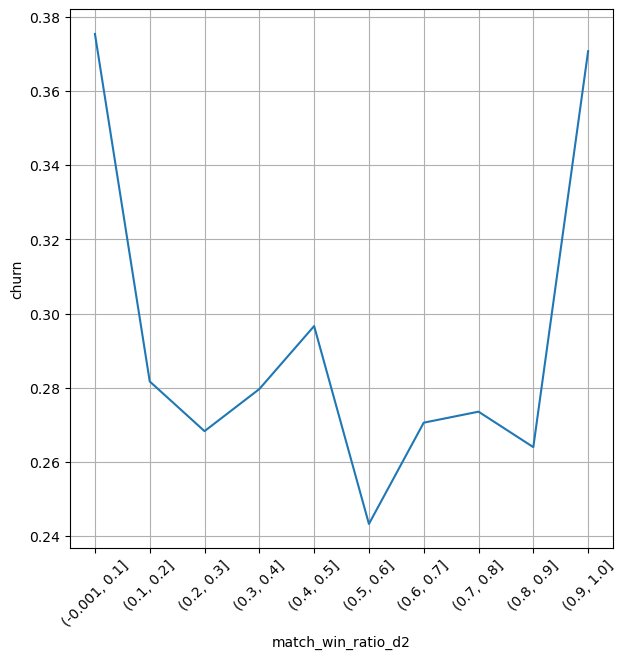

,match_win_ratio_d2,churn,users
0,"(-0.001, 0.1]",0.375448,25921
1,"(0.1, 0.2]",0.281679,2549
2,"(0.2, 0.3]",0.268270,4283
3,"(0.3, 0.4]",0.279629,10446
4,"(0.4, 0.5]",0.296624,18397
5,"(0.5, 0.6]",0.243236,7799
6,"(0.6, 0.7]",0.270555,11384
7,"(0.7, 0.8]",0.273525,9575
8,"(0.8, 0.9]",0.263957,4478
9,"(0.9, 1.0]",0.370793,17619


time: 116 ms (started: 2023-07-13 17:58:33 +05:30)


In [70]:
plot_retention('match_win_ratio_d2','churn',df2[df2['match_win_ratio_d2']>=0])

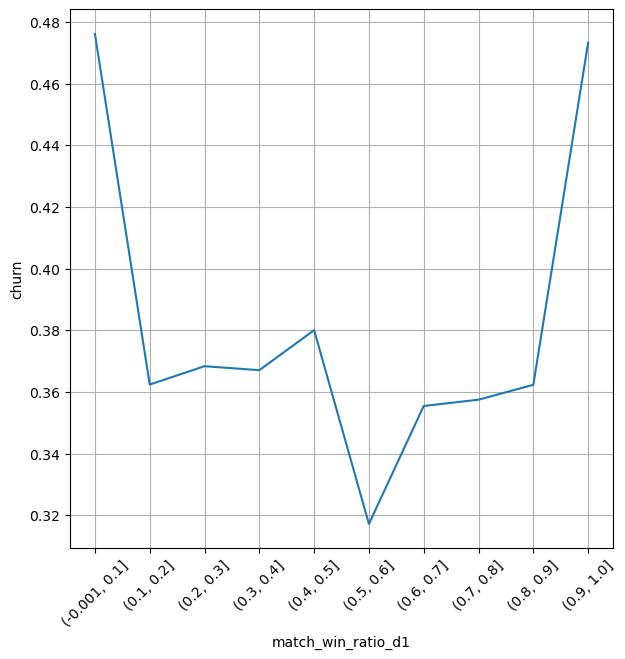

,match_win_ratio_d1,churn,users
0,"(-0.001, 0.1]",0.476119,35069
1,"(0.1, 0.2]",0.362390,4084
2,"(0.2, 0.3]",0.368349,6597
3,"(0.3, 0.4]",0.367048,15720
4,"(0.4, 0.5]",0.380042,25734
5,"(0.5, 0.6]",0.317183,12611
6,"(0.6, 0.7]",0.355442,16796
7,"(0.7, 0.8]",0.357485,14395
8,"(0.8, 0.9]",0.362310,6856
9,"(0.9, 1.0]",0.473255,23182


time: 104 ms (started: 2023-07-13 17:58:33 +05:30)


In [71]:
plot_retention('match_win_ratio_d1','churn',df2[df2['match_win_ratio_d1']>=0])

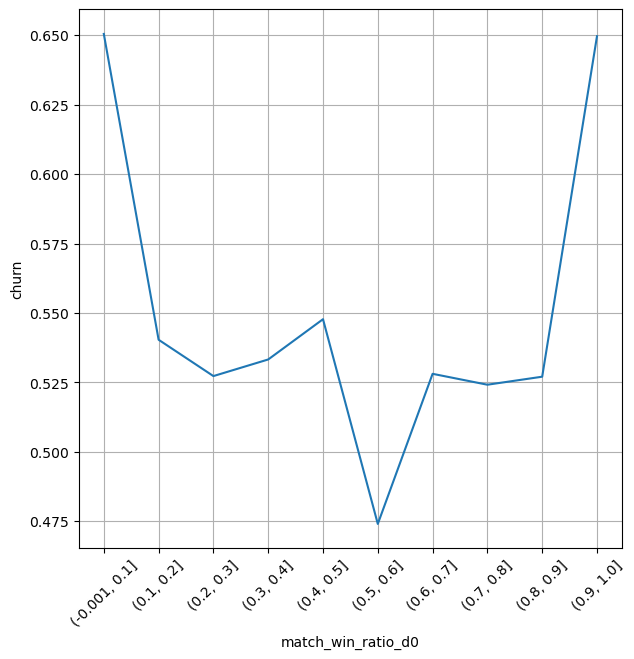

,match_win_ratio_d0,churn,users
0,"(-0.001, 0.1]",0.650472,149636
1,"(0.1, 0.2]",0.540371,19779
2,"(0.2, 0.3]",0.527292,27719
3,"(0.3, 0.4]",0.533270,56418
4,"(0.4, 0.5]",0.547763,91399
5,"(0.5, 0.6]",0.474062,44201
6,"(0.6, 0.7]",0.528106,64985
7,"(0.7, 0.8]",0.524182,60561
8,"(0.8, 0.9]",0.527066,31442
9,"(0.9, 1.0]",0.649654,105076


time: 197 ms (started: 2023-07-13 17:58:33 +05:30)


In [72]:
plot_retention('match_win_ratio_d0','churn',df2[df2['match_win_ratio_d0']>=0])

# CHURN VS MATCH FORFEITED RATIO #

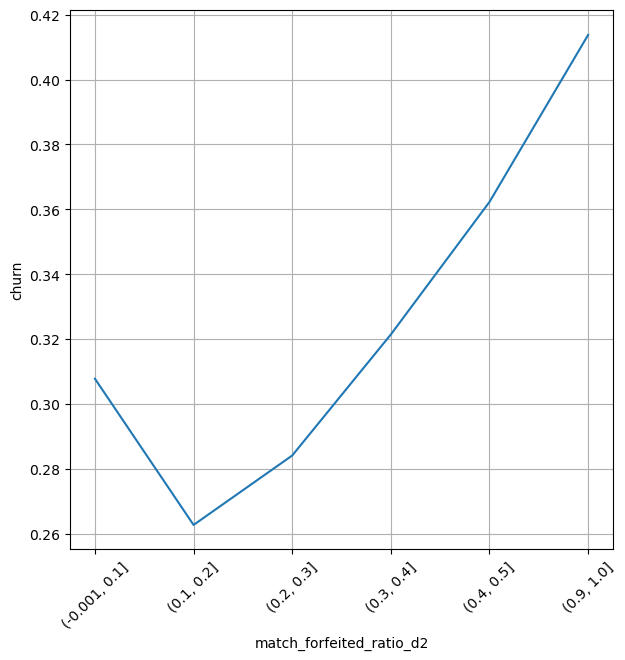

,match_forfeited_ratio_d2,churn,users
0,"(-0.001, 0.1]",0.307797,78058
1,"(0.1, 0.2]",0.262745,10455
2,"(0.2, 0.3]",0.284135,4431
3,"(0.3, 0.4]",0.321436,4903
4,"(0.4, 0.5]",0.362290,5940
9,"(0.9, 1.0]",0.413750,7971


time: 94.7 ms (started: 2023-07-13 17:58:34 +05:30)


In [73]:
plot_retention('match_forfeited_ratio_d2','churn',df2[df2['match_forfeited_ratio_d2']>=0])

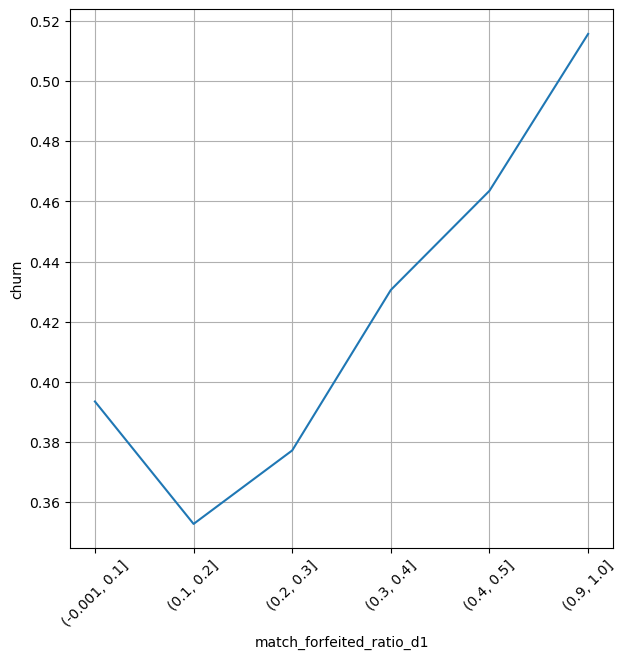

,match_forfeited_ratio_d1,churn,users
0,"(-0.001, 0.1]",0.393444,110801
1,"(0.1, 0.2]",0.352695,16700
2,"(0.2, 0.3]",0.377154,6732
3,"(0.3, 0.4]",0.430565,7021
4,"(0.4, 0.5]",0.463570,7988
9,"(0.9, 1.0]",0.515766,10656


time: 143 ms (started: 2023-07-13 17:58:34 +05:30)


In [74]:
plot_retention('match_forfeited_ratio_d1','churn',df2[df2['match_forfeited_ratio_d1']>=0])

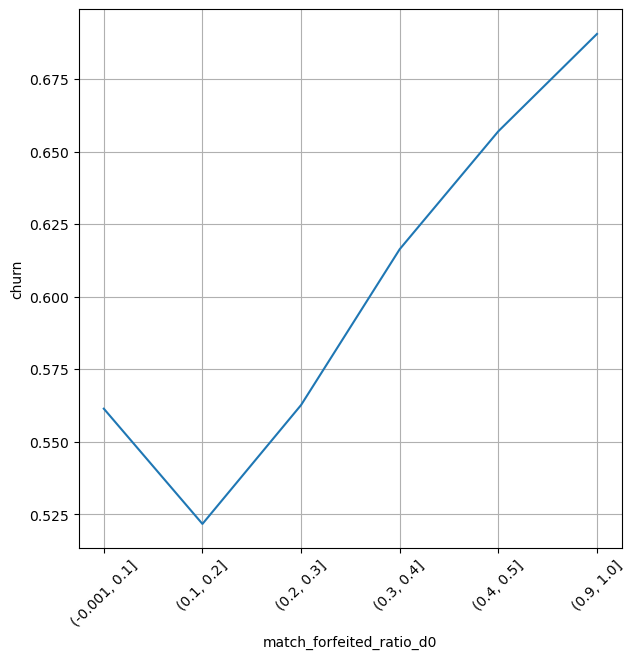

,match_forfeited_ratio_d0,churn,users
0,"(-0.001, 0.1]",0.561455,439535
1,"(0.1, 0.2]",0.521729,65074
2,"(0.2, 0.3]",0.562720,26411
3,"(0.3, 0.4]",0.616435,30837
4,"(0.4, 0.5]",0.657083,38502
9,"(0.9, 1.0]",0.690630,46168


time: 191 ms (started: 2023-07-13 17:58:35 +05:30)


In [75]:
plot_retention('match_forfeited_ratio_d0','churn',df2[df2['match_forfeited_ratio_d0']>=0])

# CHURN VS DID NOT LOAD RATIO #

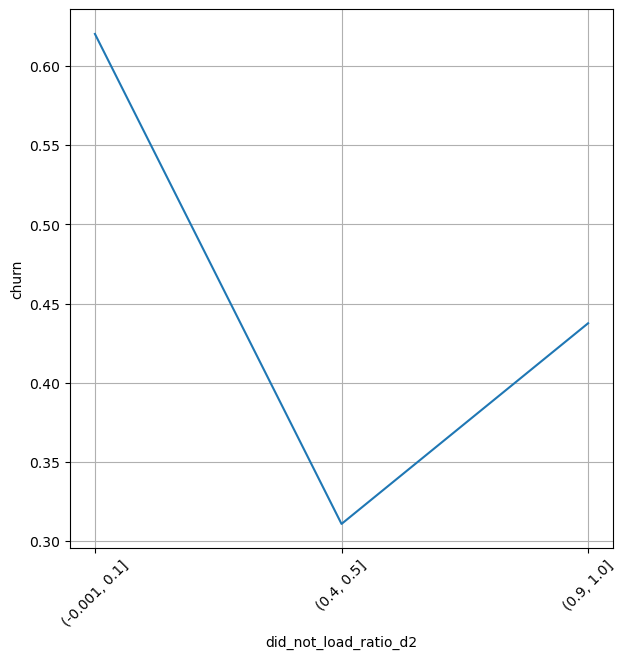

,did_not_load_ratio_d2,churn,users
0,"(-0.001, 0.1]",0.620210,786912
4,"(0.4, 0.5]",0.311015,12665
9,"(0.9, 1.0]",0.437646,51240


time: 151 ms (started: 2023-07-13 17:58:35 +05:30)


In [76]:
plot_retention('did_not_load_ratio_d2','churn',df2)

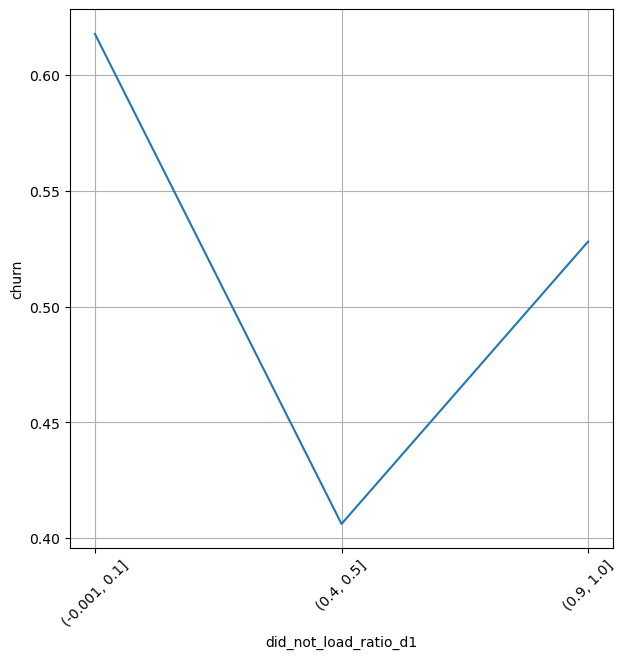

,did_not_load_ratio_d1,churn,users
0,"(-0.001, 0.1]",0.617777,759501
4,"(0.4, 0.5]",0.406191,19673
9,"(0.9, 1.0]",0.528138,63065


time: 139 ms (started: 2023-07-13 17:58:35 +05:30)


In [77]:
plot_retention('did_not_load_ratio_d1','churn',df2)

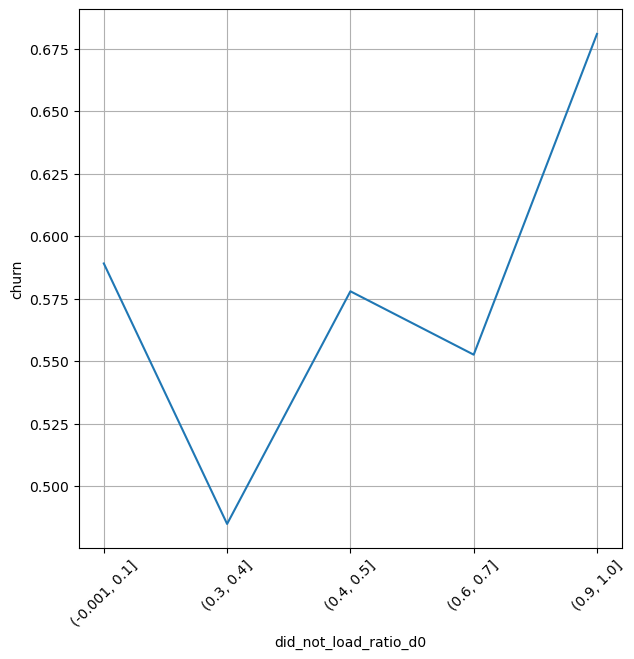

,did_not_load_ratio_d0,churn,users
0,"(-0.001, 0.1]",0.589061,575088
3,"(0.3, 0.4]",0.484828,21948
4,"(0.4, 0.5]",0.577922,63121
6,"(0.6, 0.7]",0.552555,11293
9,"(0.9, 1.0]",0.680910,172757


time: 151 ms (started: 2023-07-13 17:58:35 +05:30)


In [78]:
plot_retention('did_not_load_ratio_d0','churn',df2)

# CHURN VS DID NOT LOAD FREQ #

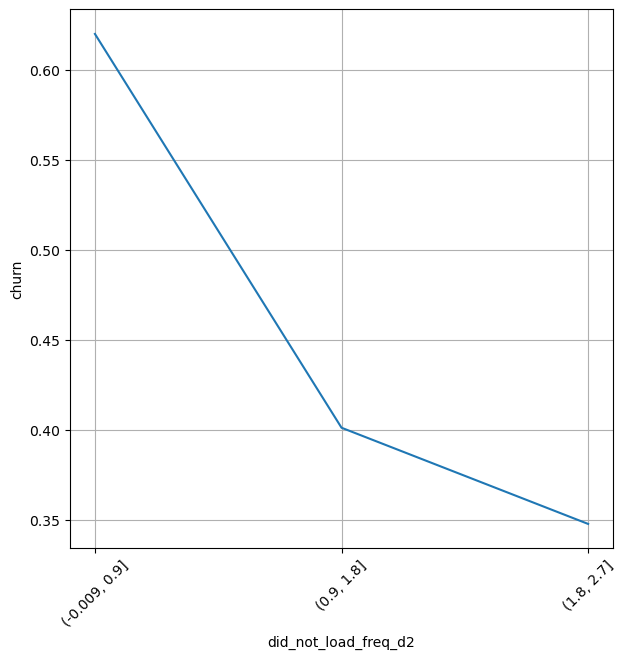

,did_not_load_freq_d2,churn,users
0,"(-0.009, 0.9]",0.620211,786911
1,"(0.9, 1.8]",0.401384,60122
2,"(1.8, 2.7]",0.347936,10318


time: 130 ms (started: 2023-07-13 17:58:36 +05:30)


In [79]:
plot_retention('did_not_load_freq_d2','churn',df2)

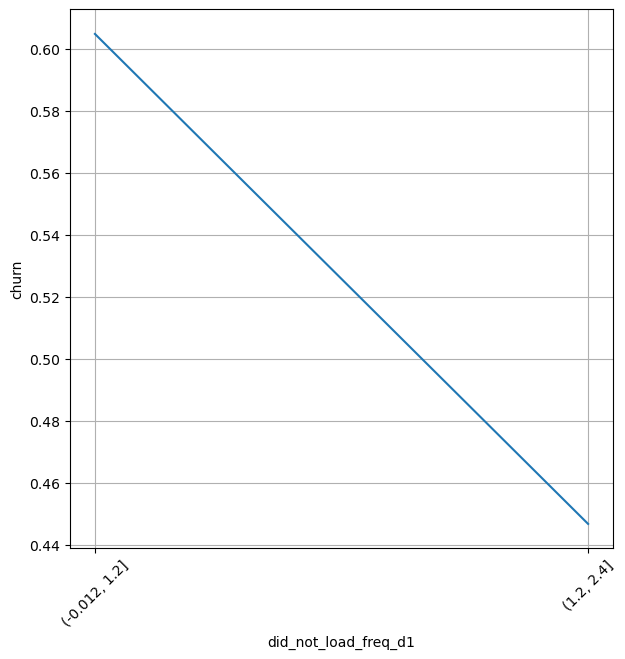

,did_not_load_freq_d1,churn,users
0,"(-0.012, 1.2]",0.604864,837932
1,"(1.2, 2.4]",0.446800,16889


time: 128 ms (started: 2023-07-13 17:58:36 +05:30)


In [80]:
plot_retention('did_not_load_freq_d1','churn',df2)

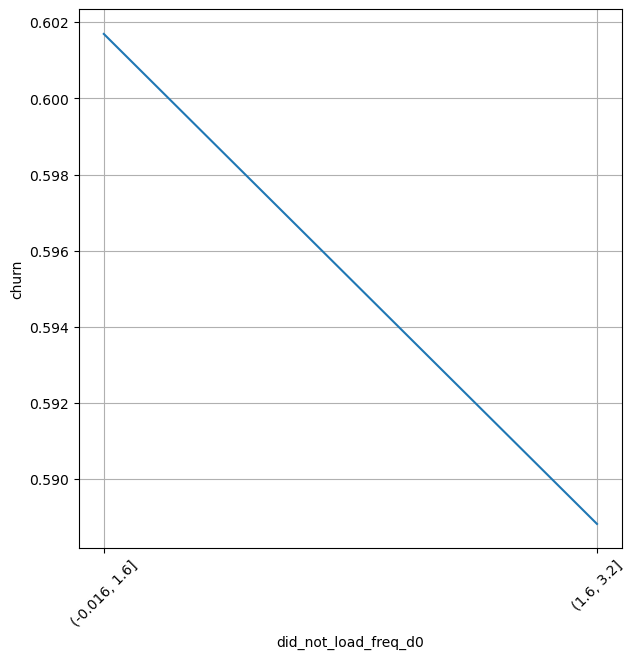

,did_not_load_freq_d0,churn,users
0,"(-0.016, 1.6]",0.601695,804241
1,"(1.6, 3.2]",0.588823,52627


time: 128 ms (started: 2023-07-13 17:58:36 +05:30)


In [81]:
plot_retention('did_not_load_freq_d0','churn',df2)

# CHURN VS BAG UNLOCKED #

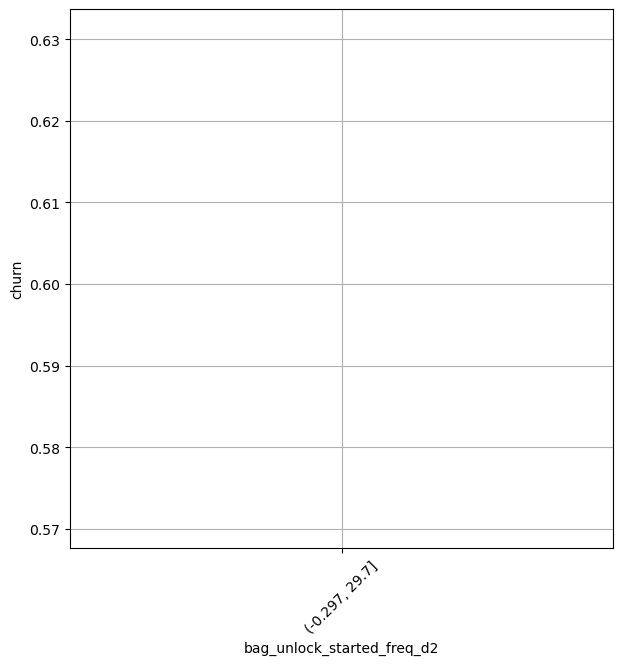

,bag_unlock_started_freq_d2,churn,users
0,"(-0.297, 29.7]",0.600661,859982


time: 152 ms (started: 2023-07-13 17:58:37 +05:30)


In [82]:
plot_retention('bag_unlock_started_freq_d2','churn',df2)

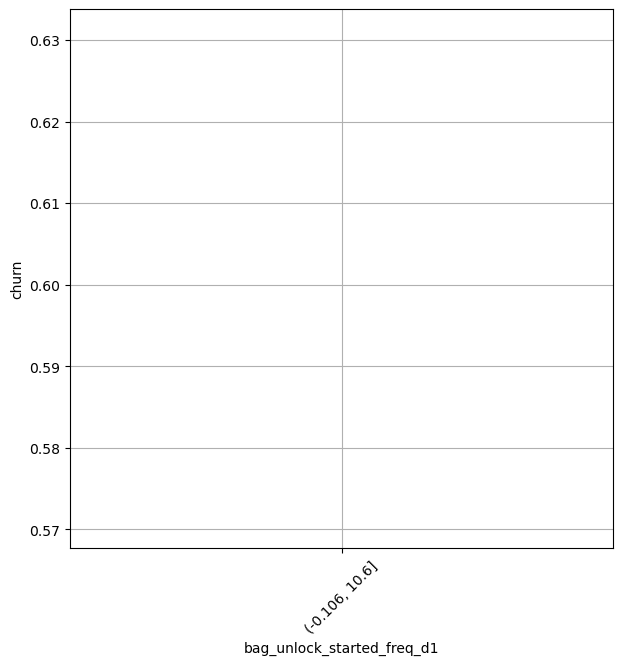

,bag_unlock_started_freq_d1,churn,users
0,"(-0.106, 10.6]",0.600742,859737


time: 129 ms (started: 2023-07-13 17:58:37 +05:30)


In [83]:
plot_retention('bag_unlock_started_freq_d1','churn',df2)

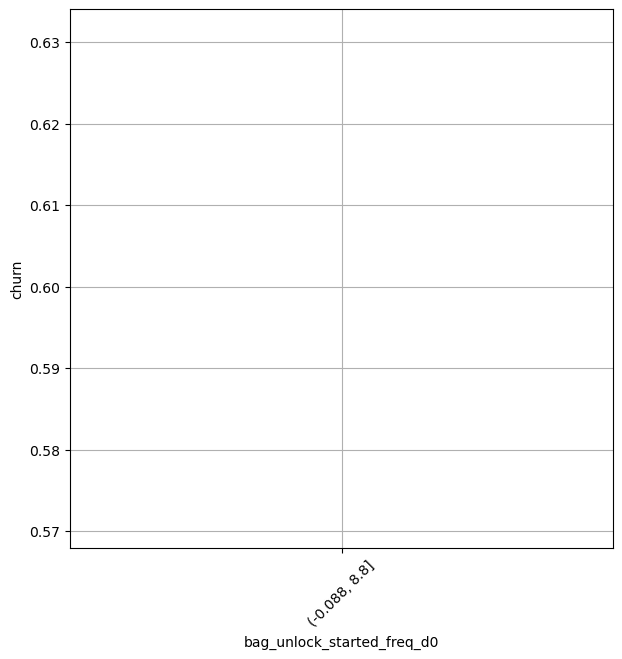

,bag_unlock_started_freq_d0,churn,users
0,"(-0.088, 8.8]",0.60095,858676


time: 134 ms (started: 2023-07-13 17:58:37 +05:30)


In [84]:
plot_retention('bag_unlock_started_freq_d0','churn',df2)

# CHURN VS BAG UNZIPPED #

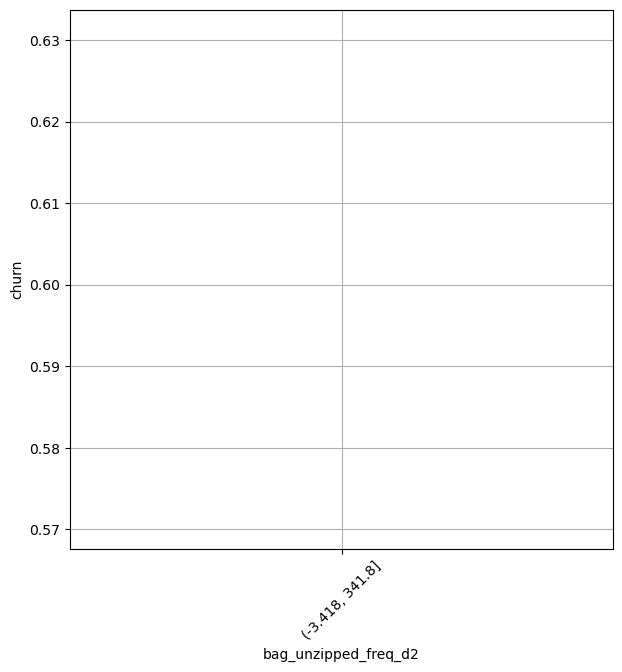

,bag_unzipped_freq_d2,churn,users
0,"(-3.418, 341.8]",0.600657,859989


time: 135 ms (started: 2023-07-13 17:58:38 +05:30)


In [85]:
plot_retention('bag_unzipped_freq_d2','churn',df2)

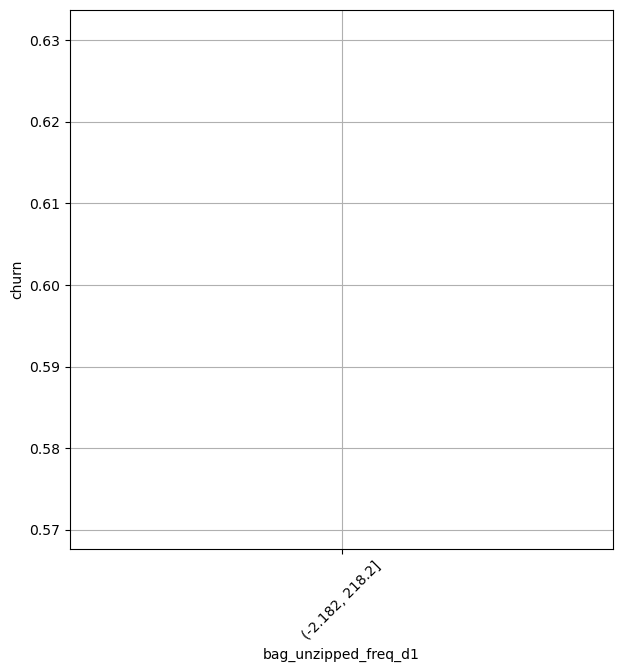

,bag_unzipped_freq_d1,churn,users
0,"(-2.182, 218.2]",0.600691,859916


time: 128 ms (started: 2023-07-13 17:58:38 +05:30)


In [86]:
plot_retention('bag_unzipped_freq_d1','churn',df2)

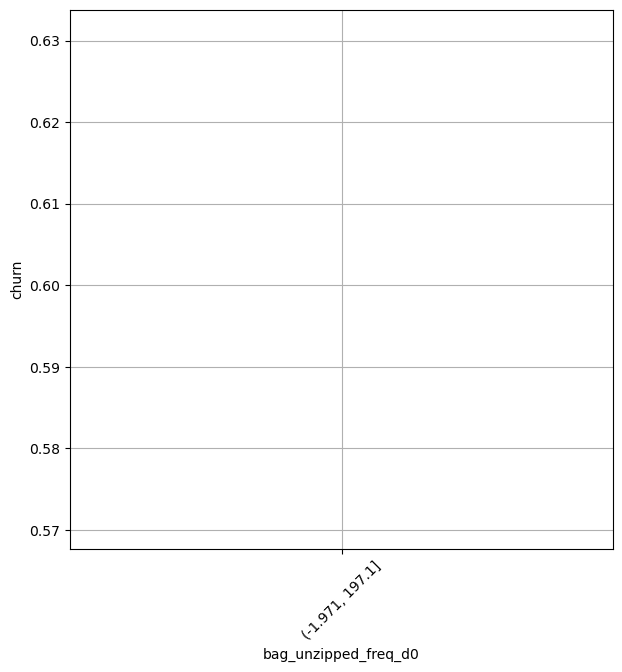

,bag_unzipped_freq_d0,churn,users
0,"(-1.971, 197.1]",0.600734,859773


time: 133 ms (started: 2023-07-13 17:58:38 +05:30)


In [87]:
plot_retention('bag_unzipped_freq_d0','churn',df2)